In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
## Step 1 Initializing :: randomly taking 4 mu's as cluster center points
csv_data = pd.read_csv('/home/sreekrishna/ML/kmean.csv') ## Reading CSV file
N = len(csv_data) ## CSV file length to N
K = 4 ## No of clusters
mu = [] ## initializing mu to empty array

## Randomly picking 'K'(no of clusters) mu's
for k in random.sample(range(N),K):
    mu.append((csv_data['lat'][k],csv_data['lng'][k]))

In [3]:
## Step 2 Iterration :: Untill we get best mu's 

## loop will be itterating till we get difference b/w mu & new_mu close to zero
metric = float('inf')
while (metric > 2**(-10)):
    ## r has 'N' rows and 'k' columns, initially assigned with zero's
    r = np.zeros((N,K))
    ## cnt holds counts close to 1's,2'nd,3'rd,4'th mu
    cnt = []
    ## Iterating to caluculate distance of each data point from mu
    for data_row in csv_data.iterrows():
        distance = []
        for k in range(K):
            distance.append(np.sqrt((mu[k][0]-data_row[1]['lat'])**2)+((mu[k][1]-data_row[1]['lng'])**2))
        ## min distance will tell us, data points closests mu's index 
        output = np.argmin(distance)
        ## Incrimenting count of corresponding mu as it got one close data point
        r[data_row[0]][output] = 1
    ## finding total count of data point close to each mu
    cnt = np.sum(r,axis=0)
    new_mu = []
    ## Caluculating new_mu
    for k in range(K):
        temp_lat = 0
        temp_lng = 0
        for data_row in csv_data.iterrows():
            temp_lat += (r[data_row[0]][k]*data_row[1]['lat'])
            temp_lng += (r[data_row[0]][k]*data_row[1]['lng'])
        new_mu.append((temp_lat/cnt[k],temp_lng/cnt[k]))
    metric = 0
    ## Finding difference b/w mu and new_mu
    for k in range(K):    
        metric += ((mu[k][0]-new_mu[k][0])**2+(mu[k][1]-new_mu[k][1])**2)
    mu = new_mu


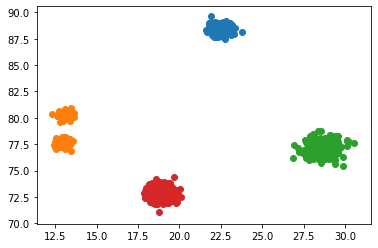

In [6]:
for k in range(K):
  data_k = csv_data[r[:,k] == 1]
  plt.scatter(data_k['lat'],data_k['lng'])